In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 확인

In [4]:
income = pd.read_csv('소득2006.csv', encoding='cp949')
income[:2]

,기준년월,행정동코드,시도명,시군구명,성별,연령별,직업구분,분위구분,평균소득,중위소득,평균처분가능소득,중위처분가능소득,소득분위배율,소득점유율,소득경계값,소득산출인구수,소득미산출인구수,소득미산출인구포함평균소득
0,2020-06-30,2814000000,인천광역시,동구,2,80,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
1,2020-06-30,2814000000,인천광역시,동구,1,60,0,3,2292.0,2300.0,2059.0,2200.0,131.2,13.5,2400.0,723,723,2292.0


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기준년월           14690 non-null  object 
 1   행정동코드          14690 non-null  int64  
 2   시도명            14690 non-null  object 
 3   시군구명           14690 non-null  object 
 4   성별             14690 non-null  int64  
 5   연령별            14690 non-null  int64  
 6   직업구분           14690 non-null  int64  
 7   분위구분           14690 non-null  int64  
 8   평균소득           12366 non-null  float64
 9   중위소득           12366 non-null  float64
 10  평균처분가능소득       12366 non-null  float64
 11  중위처분가능소득       12366 non-null  float64
 12  소득분위배율         9818 non-null   float64
 13  소득점유율          12366 non-null  float64
 14  소득경계값          12366 non-null  float64
 15  소득산출인구수        14690 non-null  int64  
 16  소득미산출인구수       14690 non-null  int64  
 17  소득미산출인구포함평균소득  12366 non-null  float64
dtypes: flo

# 전처리

## 컬럼명 변경

In [6]:
## 컬럼명 변경 : 분위구분-> 소득분위, 평균처분가능소득->평균가처분소득
income.rename(columns={'분위구분': '소득분위', '평균처분가능소득': '평균가처분소득'}, inplace=True)
income[:2]

,기준년월,행정동코드,시도명,시군구명,성별,연령별,직업구분,소득분위,평균소득,중위소득,평균가처분소득,중위처분가능소득,소득분위배율,소득점유율,소득경계값,소득산출인구수,소득미산출인구수,소득미산출인구포함평균소득
0,2020-06-30,2814000000,인천광역시,동구,2,80,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
1,2020-06-30,2814000000,인천광역시,동구,1,60,0,3,2292.0,2300.0,2059.0,2200.0,131.2,13.5,2400.0,723,723,2292.0


## 컬럼 삭제

In [7]:
## 칼럼 삭제 : 기준년월, 행정동코드, 시도명, 중위소득, 중위처분가능소득, 소득분위배율, 소득점유율, 소득경계값, 소득미산출인구수, 소득미산출인구포함평균소득
income.drop(columns=['기준년월', '행정동코드', '시도명', '중위소득', '중위처분가능소득', '소득분위배율', 
                     '소득점유율', '소득경계값', '소득미산출인구수', '소득미산출인구포함평균소득'], 
            inplace=True)
income[:2]

,시군구명,성별,연령별,직업구분,소득분위,평균소득,평균가처분소득,소득산출인구수
0,동구,2,80,4,3,NaN,NaN,4
1,동구,1,60,0,3,2292.0,2059.0,723


## 행 삭제

In [8]:
## 행 삭제 : 성별, 연령별, 직업구분, 분위구분이 '0'(소계)인 행, 시군구명이 '전체'인 행
zero_gender = income[income['성별'] == 0 ].index
income.drop(zero_gender, inplace=True)

zero_age = income[income['연령별'] == 0 ].index
income.drop(zero_age, inplace=True)

zero_job = income[income['직업구분'] == 0 ].index
income.drop(zero_job, inplace=True)

zero_rank = income[income['소득분위'] == 0 ].index
income.drop(zero_rank, inplace=True)

all_district = income[income['시군구명'] == '전체' ].index
income.drop(all_district, inplace=True)

## 행 삭제 확인

In [9]:
# 행 삭제 결과 확인
print((income.성별 == 0).sum())
print((income.연령별 == 0).sum())
print((income.직업구분 == 0).sum())
print((income.소득분위 == 0).sum())
print((income.시군구명 == '전체').sum())
income[:2]

0
0
0
0
0


,시군구명,성별,연령별,직업구분,소득분위,평균소득,평균가처분소득,소득산출인구수
0,동구,2,80,4,3,NaN,NaN,4
2,동구,2,30,3,6,3083.0,2352.0,121


## 결측치 확인

In [10]:
#결측치 여부 확인 : 평균소득, 평균가처분소득
income.isna().sum()

시군구명          0
성별            0
연령별           0
직업구분          0
소득분위          0
평균소득       1213
평균가처분소득    1213
소득산출인구수       0
dtype: int64

## 결측치 삭제

In [11]:
## 결측치 삭제 : 평균소득, 평균가처분소득
income.dropna(how='any', inplace=True)
income[:7]

,시군구명,성별,연령별,직업구분,소득분위,평균소득,평균가처분소득,소득산출인구수
2,동구,2,30,3,6,3083.0,2352.0,121
6,동구,1,70,1,8,3914.0,3128.0,22
10,동구,1,15,4,3,2248.0,2246.0,21
12,동구,1,50,2,10,8120.0,6418.0,114
13,동구,2,20,4,2,1963.0,1843.0,412
17,동구,1,50,1,9,5113.0,3852.0,123
101,남동구,2,30,2,1,1542.0,1175.0,24


# 파일저장

In [12]:
income.to_csv('income.csv', index=False, encoding='utf-8')
print('저장완료')

저장완료


# 파일 읽어오기

In [13]:
income = pd.read_csv('income.csv', encoding='UTF-8')
income[:7]

,시군구명,성별,연령별,직업구분,소득분위,평균소득,평균가처분소득,소득산출인구수
0,동구,2,30,3,6,3083.0,2352.0,121
1,동구,1,70,1,8,3914.0,3128.0,22
2,동구,1,15,4,3,2248.0,2246.0,21
3,동구,1,50,2,10,8120.0,6418.0,114
4,동구,2,20,4,2,1963.0,1843.0,412
5,동구,1,50,1,9,5113.0,3852.0,123
6,남동구,2,30,2,1,1542.0,1175.0,24


# 가설
- [가설1] 평균소득은 지속적으로 상승하다가 50대에 정점을 찍고 하락할 것이다.
- [가설2] 직업별 평균급여는 상장사 근로소득자가 가장 높을 것이다.
- [가설3] 성별 평균소득은 여성이 남성보다 낮을 것이다.
- [가설4] 소득분위 4~6분위에 가장 많은 인구가 분포할 것이다.
- [가설5] 연령이 30세 미만인 비경제활동인구 중에서 소득분위가 10분위인 사람들은 연수구에 가장 많을 것이다.

## 주석
* 성별 [1 : 남성, 2 : 여성 ]
* 연령별 [15 : 15세 ~ 19세, 20 : 20세 ~ 29세, 30 : 30세 ~ 39세, … , 90 : 90세 이상]
* 직업구분 [1:자영업자. 2:급여소득자(상장). 3:급여소득자(비상장). 4:비경제활동인구]
* 소득분위 [집계 기준일자의 전국 인구를 대상으로 추정된 연소득추정금액에서 소득10분위 , 기준에 따라 해당 시도 거주민 대상으로 소득10분위 구분]
* 평균소득 [NICE  연소득추정금액의 평균 ※ 소득추정금액합계/소득산출인구수로 계산 ** 단위 : 만원]
* 평균가처분소득 [소득추정금액 - 연간원리금상환금액 ** 단위 : 만원]

## [가설1] 평균소득은 연령이 높아짐에 따라 지속적으로 상승하다가 50대에 정점을 찍고 하락 반전할 것이다.

### 가설분석

In [14]:
#연령별 평균소득의 평균
g_age_income = income.groupby('연령별').평균소득.mean()
g_age_income.round(2)

연령별
15    2667.59
20    3352.80
30    3494.42
40    3793.96
50    3899.05
60    3797.73
70    3487.37
80    2791.29
90    1500.00
Name: 평균소득, dtype: float64

### 시각화

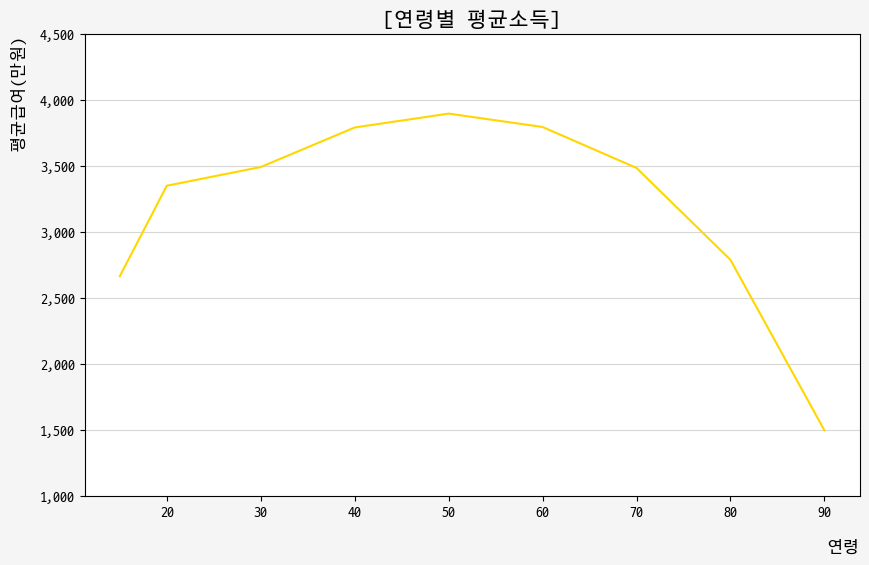

In [15]:
#연령별 평균소득 시각화
plt.figure(figsize=(10,6), facecolor='#f5f5f5')
plt.rc('font', family = 'D2coding')

g_age_income.plot(kind='line'
                  , rot=0,
                  color='Gold',
                 )
plt.xlabel('연령', labelpad=15, size=12, loc='right')
plt.ylabel('평균급여(만원)', labelpad=10, size=12, loc='top')
plt.title('[연령별 평균소득]', size=15)
plt.grid(axis='y', alpha=0.5)

y_ticks = plt.gca().get_yticks()
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels([f'{x:,.0f}' for x in y_ticks])

plt.savefig('연령별평균소득.png', dpi=120)

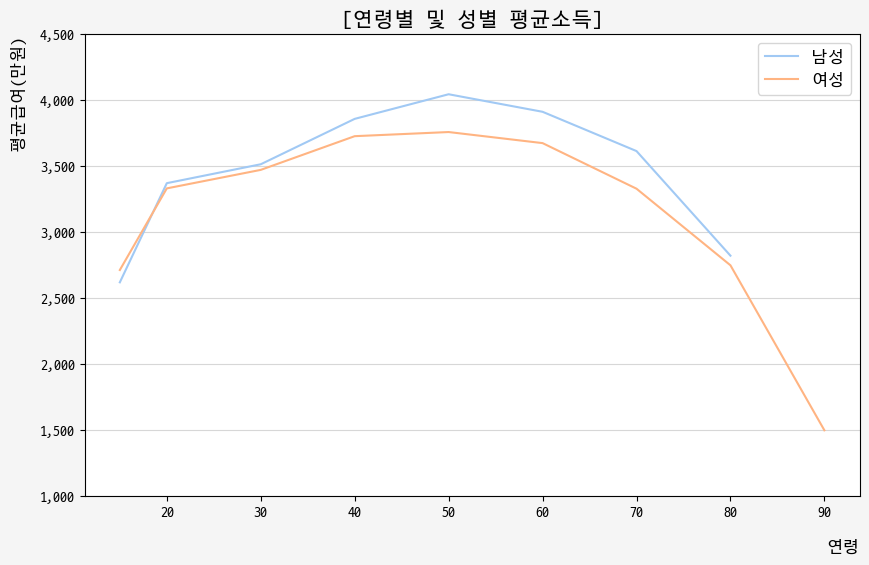

In [16]:
#성별을 구분한 연령별 평균소득
plt.figure(figsize=(10,6), facecolor='#f5f5f5')
plt.rc('font', family = 'D2coding')

sns.lineplot(data=income, 
             x='연령별',
             y='평균소득',
             hue='성별',
             palette='pastel',
             errorbar=None
            )

plt.title('[연령별 및 성별 평균소득]', size=15)
plt.xlabel('연령', labelpad=15, size=12, loc='right')
plt.ylabel('평균급여(만원)', labelpad=10, size=12, loc='top')
plt.grid(axis='y', alpha=0.5)

y_ticks = plt.gca().get_yticks()
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels([f'{x:,.0f}' for x in y_ticks])

plt.legend(['남성','여성'], fontsize=12)

plt.savefig('연령별 및 성별 평균소득.png', dpi=120)

### 결론
    - [가설1] 평균소득은 연령이 높아짐에 따라 지속적으로 상승하다가 50대에 정점을 찍고 하락 반전할 것이다.
    - 10대에서 20대로 넘어가는 구간의 평균소득은 약 25%p 증가하여 모든 구간 중에서 가장 크게 증가한다.
    - 20대 이후 평균소득은 서서히 증가하여 50대에 약3,899만원으로 정점을 찍는다.
    - 50대 이후부터 상승이 하락으로 반전되고 급격한 하락을 보이며 90세 이후 약 1,500만원으로 최저점을 찍는다.
    - 성별이 연령대별 평균소득의 추세에 미치는 영향은 미미하다.

## [가설2] 직업별 평균급여는 상장사 근로소득자가 가장 높을 것이다.

### 가설 분석

In [17]:
## 직업별 평균소득
for idx in range(1,5):
    g_job_income = income.groupby(['직업구분']).get_group(idx).평균소득.mean().round(2)
    print(g_job_income)

3764.48
4051.04
3428.88
3364.16


### 시각화

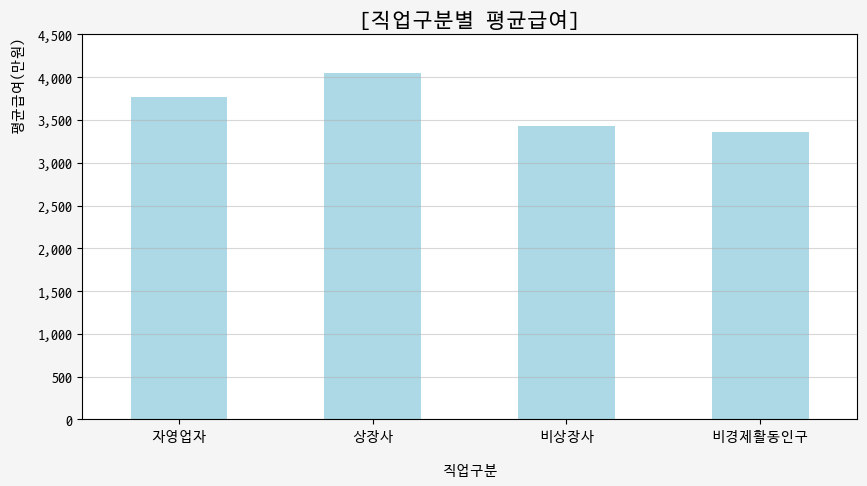

In [18]:
plt.figure(figsize=(12,8), facecolor='#f5f5f5')
income.groupby('직업구분').평균소득.mean().plot(kind='bar', 
                                        rot=0, 
                                        color='LightBlue',
                                        figsize=(10,5))

plt.xlabel('직업구분', labelpad=15)
plt.ylabel('평균급여(만원)', labelpad=10, loc='top')
plt.title('[직업구분별 평균급여]', size=15)

plt.xticks(np.arange(0,4,1), ('자영업자', '상장사', '비상장사', '비경제활동인구'))
plt.grid(axis='y', alpha=0.5)

y_ticks = plt.gca().get_yticks()
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels([f'{x:,.0f}' for x in y_ticks])

plt.savefig('직업구분별 평균급여.png', dpi=120)

### 결론
    - [가설2] 직업 별 평균급여는 상장사 근로소득자가 가장 높을 것이다.
    - 직업별 평균소득은 자영업자 약 3,764만원, 상장사 근로소득자 약 4,051만원, 비상장사 근로소득자 약 3,429만원, 비경제활동인구 약 3,364만원으로 나타났다.
    - 평균소득의 순위는 상장사 근로소득자, 자영업자, 비상장사 근로소득자, 비경제활동인구 순이다.
    - 상장사 근로소득자의 평균급여와 비경제활동인구의 평균급여 차이금액은 약 687만원으로 상장사 근로소득자가 약 20%p정도 더 높다.
    - 근로소득자의 경우 상장사 근로소득자의 평균소득이 비상장사 근로소득자의 평균소득보다 약 622만원(약18%p) 더 높다.


## [가설3] 성별 평균소득은 여성이 남성보다 낮을 것이다.

### 가설 분석

In [19]:
#성별 평균소득
income[['성별', '평균소득']].groupby('성별').평균소득.mean()

성별
1    3637.771037
2    3500.065878
Name: 평균소득, dtype: float64

### 시각화

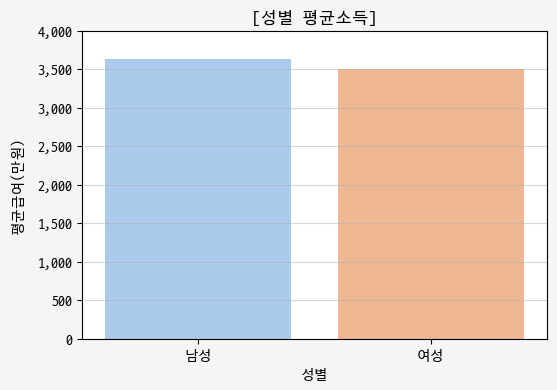

In [20]:
plt.figure(figsize=(12,8), facecolor='#f5f5f5')

fig = sns.barplot(data=income, 
            x='성별', 
            y='평균소득',
            palette='pastel',
            errorbar=None
           ).set_title("[성별 평균소득]")
fig.figure.set_size_inches(6, 4)
plt.ylabel('평균급여(만원)', labelpad=10)
plt.xticks(np.arange(0,2,1), ('남성', '여성'))
plt.grid(axis='y', alpha=0.5)

y_ticks = plt.gca().get_yticks()
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels([f'{x:,.0f}' for x in y_ticks])

plt.savefig('성별 평균소득.png', dpi=120)

### 결론
    - [가설3] 성별 평균소득은 여성이 남성보다 낮을 것이다.
    - 여성의 평균소득은 약 3,500만원이고, 남성의 평균소득은 약 3,637만원이다.
    - 남여간의 평균소득 격차는 약 137만원으로 남성이 평균소득이 여성의 평균소득보다 근소하게 높다.

## [가설4] 소득분위 4~7분위에 가장 많은 소득산출인구가 분포할 것이다.

### 가설 분석

In [21]:
# 소득산출인구수 : 2,214,847명
income.소득산출인구수.sum()

2214847

In [22]:
## 소득분위별 소득산출인구수의 합
g_rank = income[['소득분위','소득산출인구수']].groupby('소득분위').sum().sort_values(by='소득산출인구수', ascending=False)
g_rank

,소득산출인구수
소득분위,
4,248314
3,248109
2,228084
6,226826
5,226242
8,220400
7,215330
1,212547
9,209198


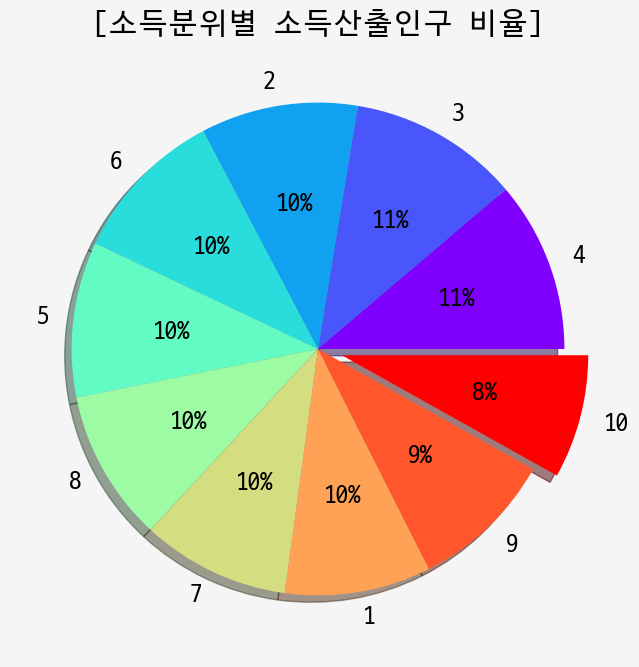

In [23]:
# 시각화
plt.figure(figsize=(8,8), facecolor='#f5f5f5')
plt.rc('font', size = 18)

g_rank = income.groupby('소득분위').소득산출인구수.sum().sort_values(ascending=False)

g_rank.plot(kind='pie',
            y='소득산출인구수',
            x='소득분위',
            colormap='rainbow',
            title='[소득분위별 소득산출인구 비율]',
            explode=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
            shadow=True,
            autopct='%.f%%'
            )
plt.gca().axes.yaxis.set_visible(False)

plt.savefig('소득분위별 소득산출인구수 비율.png', dpi=120)

### 시각화

### 결론
    - [가설4] 소득분위 4~7분위에 가장 많은 소득산출인구가 분포할 것이다.
    - 소득산출인구는 각 소득분위마다 약 10% 내외의 분포율을 나타냈다.
    - 소득분위 4분위의 인구가 248,314명(11%)으로 가장 많았고, 소득분위 10분위의 인구가 179,797명(8%)으로 가장 적었다.
    - 특정 분위에 소득산출인구가 밀집돼있지 않고 고르게 분포돼있다.

## [가설5] 연령이 30세 미만인 비경제활동인구 중에서 소득분위가 10분위인 사람들은 연수구에 가장 많을 것이다.

### 가설 분석

In [24]:
## 30대 미만 비경제활동인구수 : 331,076
u30_inactive = income[(income.연령별 < 30) & (income.직업구분 == 4)]
u30_inactive['소득산출인구수'].sum()

331076

In [25]:
## 30대 미만 비경제활동인구 중 소득분위가 10위인 사람들 : 3,620
g_u30_inactive_top10 = u30_inactive.groupby('소득분위').get_group(10).sort_values(by='시군구명')
g_u30_inactive_top10['소득산출인구수'].sum()

3620

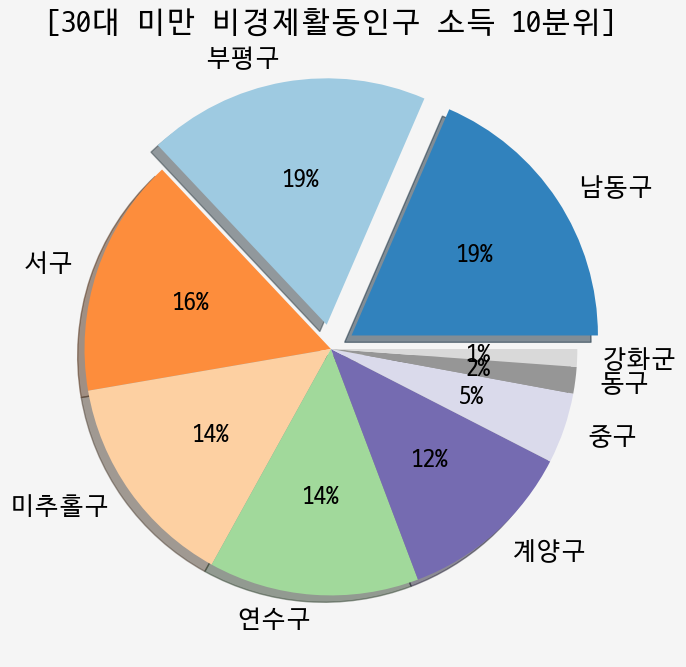

In [26]:
#시각화
plt.figure(figsize=(12,8), facecolor='#f5f5f5')
plt.rc('font', size = 18)

young_and_rich = income[(income.연령별 < 30) & (income.직업구분 == 4) & (income.소득분위 == 10)]

gold_spoon = young_and_rich[['시군구명', '소득산출인구수']].groupby('시군구명').소득산출인구수.sum().sort_values(ascending=False)

gold_spoon.plot(kind='pie',
                y='소득산출인구수',
                x='시군구명', 
                colormap='tab20c',
                autopct='%.f%%',
                title='[30대 미만 비경제활동인구 소득 10분위]',
                explode=[0.1, 0.1, 0, 0, 0, 0, 0, 0, 0],
                shadow=True
                )
plt.gca().axes.yaxis.set_visible(False)

plt.savefig('30대 미만 비경제활동인구 소득 10분위.png', dpi=140)

### 시각화

### 결론
    - [가설5] 연령이 30세 미만인 비경제활동인구 중에서 소득분위가 10분위인 사람들은 연수구에 가장 많을 것이다.
    - 30세 미만의 비경제활동인구 331,076명 중에서 소득분위가 10분위인 사람은 3,620명이 존재한다.
    - 남동구(19%)와 부평구(19%)가 공동 1위를 기록했다.
    - 서구(16%)는 3위, 미추홀구(14%)와 연수구(14%)가 공동 5위, 계양구(12%)가 6위를 차지했다.
    - 중구(5%), 동구(2%), 강화군(1%), 옹진군(0%)은 모두 10%미만으로 그 뒤를 이었다.